# ML scratch - an attempt to try and remember the basics again

In [109]:
import numpy as np

import matplotlib.pyplot as plt

import random
import math

from scipy import stats

from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [33]:
# Linear regression problem
X = np.array([0, 1, 2, 3, 4, 5]) 
Y = np.array([0, 1.1, 1.9, 3, 4.2, 5.2])  

In [34]:
m = np.random.randn()
b = np.random.randn()

learning_rate = 0.01
epochs = 10000

for _ in range(epochs):
    random_idx = np.random.randint(len(X))
    x = X[random_idx]
    y = Y[random_idx]
    pred = m * x + b
    grad_m = (pred - y) * x
    grad_b = (pred - y) 
    m -= learning_rate * grad_m
    b -= learning_rate * grad_b
    

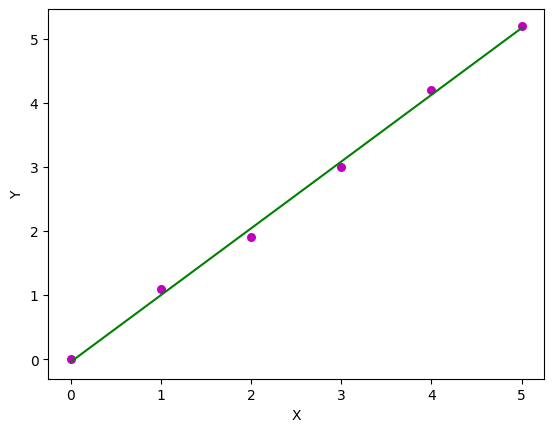

In [35]:
import matplotlib.pyplot as plt

# Plot the data points
plt.scatter(X, Y, color = "m", marker = "o", s = 30)

# Predicted line for the model
y_pred = m * X + b

# Plotting the predicted line
plt.plot(X, y_pred, color = "g")

# Adding labels to the plot
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

In [36]:
def gradient_descent(X, y, learning_rate=0.01, batch_size=16, epochs=100):
    m, n = X.shape
    theta = np.random.randn(n, 1)

    for epoch in range(epochs):
        shuffled_idxs = np.random.permutation(m)
        X_shuffled = X[shuffled_idxs]
        y_shuffled = y[shuffled_idxs]

        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i + batch_size]
            yi = y_shuffled[i:i + batch_size]
            gradients = 2 / batch_size * xi.T @ (xi @ theta - yi)
            theta = theta - learning_rate * gradients
    return theta

In [37]:
from sklearn.metrics import mean_absolute_error

# Apply function to some data
X = np.random.rand(100, 3)
y = 5 * X[:, 0] - 3 * X[:, 1] + 2 * X[:, 2] + np.random.randn(100, 1)  # sample linear regression problem
theta = gradient_descent(X, y)

# Predict and calculate MAE
predictions = X.dot(theta)
mae = mean_absolute_error(y, predictions)
print(f"MAE: {mae}")  # MAE: 1.0887166179544072

MAE: 0.9088785736164534


# SGD variants

## Momentum

In [38]:
def func(x):
    return x**2

def grad_func(x):
    return 2 * x

gamma = 0.9
learning_rate = 0.01
v = 0
epochs = 50

theta_plain = 4.0
theta_momentum = 4.0

history_plain = []
history_momentum = []

for _ in range(epochs):
    history_plain.append(theta_plain)
    gradient = grad_func(theta_plain)
    theta_plain -= learning_rate * gradient

    history_momentum.append(theta_momentum)
    gradient = grad_func(theta_momentum)
    v = gamma * v + learning_rate * gradient
    theta_momentum -= v

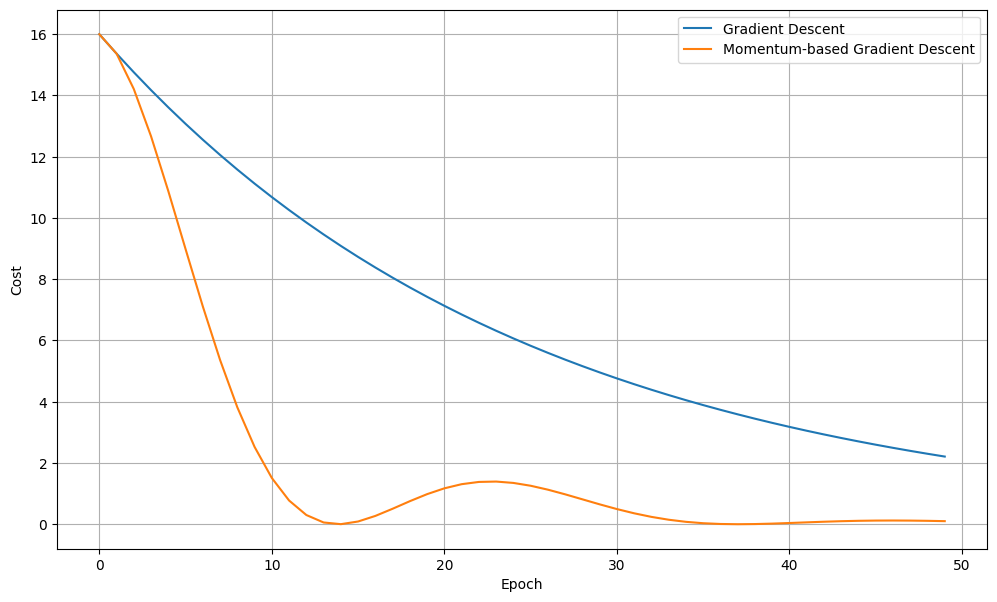

In [39]:
plt.figure(figsize=(12, 7))
plt.plot([func(theta) for theta in history_plain], label='Gradient Descent')
plt.plot([func(theta) for theta in history_momentum], label='Momentum-based Gradient Descent')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.legend()
plt.grid()
plt.show()

## RMSProp

In [40]:
def RMSProp(learning_rate, rho, epsilon, grad, s_prev):
    s = rho * s_prev + (1 - rho) * np.power(grad, 2)
    updates = learning_rate * (grad / (np.sqrt(s) + epsilon))
    return updates, s

In [41]:
def f(x, y):
    return x**2 + y**2

def df(x, y):
    return np.array([2 * x, 2 * y])

coordinates = np.array([5.0, 4.0])
learning_rate = 0.1
rho = 0.9
epsilon = 1e-6
max_epochs = 100

s_prev = np.array([0, 0])

for epoch in range(max_epochs + 1):
    grad = df(coordinates[0], coordinates[1])
    updates, s_prev = RMSProp(learning_rate, rho, epsilon, grad, s_prev)
    coordinates -= updates
    if epoch % 20 == 0:
        print(f'Epoch {epoch}, current -> {coordinates}')

    

Epoch 0, current -> [4.68377233 3.68377236]
Epoch 20, current -> [2.3688824  1.47561697]
Epoch 40, current -> [0.95903672 0.35004133]
Epoch 60, current -> [0.13761293 0.00745214]
Epoch 80, current -> [3.91649374e-04 3.12725069e-09]
Epoch 100, current -> [-3.07701828e-17  2.18862195e-20]


## ADAM

In [42]:
def ADAM(beta1, beta2, epsilon, grad, m_prev, v_prev, learning_rate):
    m = beta1 * m_prev + (1 - beta1) * grad
    v = beta2 * v_prev + (1 - beta2) * np.power(grad, 2)
    updates = learning_rate * (m / (np.sqrt(v) + epsilon))
    return updates, m, v

In [43]:
coordinates = np.array([3.0, 4.0])
learning_rate = 0.02
beta1 = 0.9
beta2 = 0.9999
epsilon = 1e-8
max_epochs = 150

m_prev = np.array([0, 0])
v_prev = np.array([0, 0])

for epoch in range(max_epochs + 1):
    grad = df(coordinates[0], coordinates[1])
    updates, m_prev, v_prev = ADAM(beta1, beta2, epsilon, grad, m_prev, v_prev, learning_rate)
    coordinates -= updates
    if epoch % 30 == 0:
        print(f"Epoch {epoch}, current state: {coordinates}")


Epoch 0, current state: [2.80000003 3.80000002]
Epoch 30, current state: [ 0.27175946 -0.35494334]
Epoch 60, current state: [-0.07373187 -0.06706317]
Epoch 90, current state: [-0.02001478  0.0301726 ]
Epoch 120, current state: [ 0.00082782 -0.0039881 ]
Epoch 150, current state: [ 0.00094425 -0.00038352]


# Unsupervised Learning and Clustering

## K-means basics

In [46]:
# Toy dataset with 2D points
data = [(2,3), (5,3.4), (1.3,1), (3,4), (2,3.5), (7,5)]

# k-Means settings
k = 2  
centers = random.sample(data, k)  

In [51]:
def distance(point1, point2):
    return math.sqrt(sum((x - y)**2 for x, y in zip(point1, point2)))

In [56]:
def k_means(data, centers, k):
    while True:
        clusters = [ [] for _ in range(k) ]

        for point in data:
            distances = [distance(point, center) for center in centers]
            idx = distances.index(min(distances))
            clusters[idx].append(point)

        new_centers = []
        for cluster in clusters:
            c = [ sum(l) / len(l) for l in zip(*cluster) ]
            new_centers.append((c[0], c[1]))

        centers_dist = [distance(new, old) for new, old in zip(new_centers, centers)]
        if max(centers_dist) < 0.0001:
            break
        else:
            centers = new_centers
    return clusters, centers

In [57]:
clusters, centers = k_means(data, centers, k)

# Let's print the cluster centers
for i, center in enumerate(centers):
    print(f"Cluster{i+1} center is : {center}")
# Cluster1 center is : (2.66, 2.98)
# Cluster2 center is : (7.0, 5.0)

# Let's print the clusters
for i, cluster in enumerate(clusters):
    print(f"Cluster{i+1} points are : {cluster}")
# Cluster1 points are : [(2, 3), (5, 3.4), (1.3, 1), (3, 4), (2, 3.5)]
# Cluster2 points are : [(7, 5)]

Cluster1 center is : (6.0, 4.2)
Cluster2 center is : (2.075, 2.875)
Cluster1 points are : [(5, 3.4), (7, 5)]
Cluster2 points are : [(2, 3), (1.3, 1), (3, 4), (2, 3.5)]


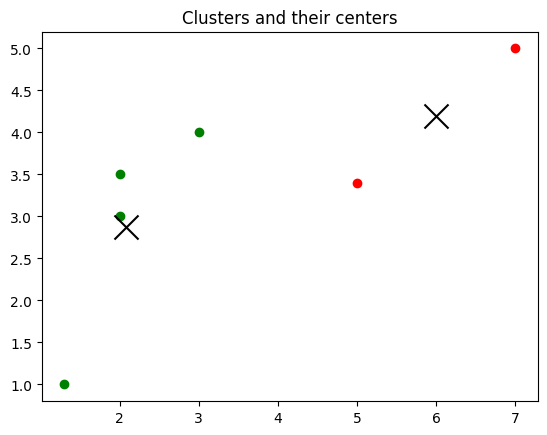

In [59]:
import matplotlib.pyplot as plt

colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()

# Plot points
for i, cluster in enumerate(clusters):
    for point in cluster:
        ax.scatter(*point, color=colors[i])

# Plot centers
for i, center in enumerate(centers):
    ax.scatter(*center, color='black', marker='x', s=300)

ax.set_title('Clusters and their centers')
plt.show()

## k-means mini batch

In [60]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
data = np.vstack([np.random.normal(loc=3, scale=1, size=(100,2)), np.random.normal(loc=-3, scale=1, size=(100,2))])

def euclidean_distance(a, b):
    return np.linalg.norm(a - b, axis=-1)

def initialize_centers(data, k):
    idx = np.random.choice(len(data), size=k)
    return data[idx, :]

In [61]:
def mini_batch_k_means(data, k, iterations=10, batch_size=20):
    centers = initialize_centers(data, k)
    for _ in range(iterations):
        idx = np.random.choice(len(data), size=batch_size)
        batch = data[idx, :]
        dists = euclidean_distance(batch[:, None, :], centers[None, :, :]) # batch[batch_size, 1, num_features] and centers[1, num_centers, num_features]
        # dists is (batch_size, num_centers)
        labels = np.argmin(dists, axis=1)
        for i in range(k):
            if np.sum(labels == i) > 0:
                centers[i] = np.mean(batch[labels == i], axis=0)
    return centers

centers = mini_batch_k_means(data, k=2)

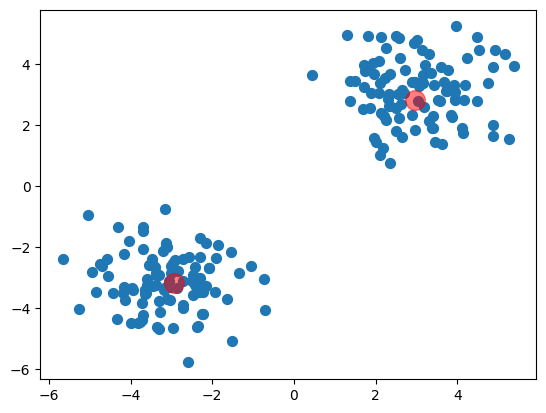

In [62]:
plt.scatter(data[:, 0], data[:, 1], s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.show()

# Decision Trees

## Bagging with DTs

In [83]:
# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Parameters
n_models = 100
random_states = [i for i in range(n_models)]

In [84]:
def bootstrapping(X, y):
    n_samples = X.shape[0]
    idxs = np.random.choice(n_samples, n_samples, replace=True)
    return X[idxs], y[idxs]

In [85]:
def predict(X, models):
    predictions = np.array([model.predict(X) for model in models])
    predictions = stats.mode(predictions)[0]
    return predictions

In [86]:
tree_models = []
for i in range(n_models):
    X_, y_ = bootstrapping(X_train, y_train)
    tree = DecisionTreeClassifier(max_depth=2, random_state=random_states[i])
    tree.fit(X_, y_)
    tree_models.append(tree)

y_pred = predict(X_test, tree_models)

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  1.0


## Random forest

In [92]:
class RandomForest:
    def __init__(self, n_trees=100, max_depth=2, random_state=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.random_states = np.random.RandomState(random_state).randint(0,10000,size=n_trees)
        self.trees = []

    def bootstrapping(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def fit(self, X, y):
        for i in range(self.n_trees):
            X_, y_ = self.bootstrapping(X, y)
            tree = DecisionTreeClassifier(max_depth=self.max_depth, random_state=self.random_states[i])
            tree.fit(X_, y_)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        return stats.mode(tree_preds)[0]
            

In [93]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

rf = RandomForest(n_trees=100, max_depth=2, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  1.0


## AdaBoost

In [101]:
class AdaBoost:
    def __init__(self, num_learners=10, learning_rate=0.1):
        self.num_learners = num_learners
        self.learning_rate = learning_rate
        self.models = []
        self.model_weights = []

    def fit(self, X, y):
        M, N = X.shape
        W = np.ones(M) / M
        y = y * 2 - 1 # [-1, 1] range
        for _ in range(self.num_learners):
            tree = DecisionTreeClassifier(max_depth=1)
            tree.fit(X, y, sample_weight=W)
            pred = tree.predict(X)
            error = W @ (pred != y)
            if error > 0.5:
                break
            beta = self.learning_rate * np.log((1 - error) / error)
            W = W * np.exp(beta * (pred != y))
            W = W / W.sum()

            self.models.append(tree)
            self.model_weights.append(beta)

    def predict(self, X):
        Hx = sum(beta * h.predict(X) for h, beta in zip(self.models, self.model_weights))
        return Hx > 0

In [102]:
data = make_classification(n_samples=1000)  # Creates a synthetic dataset
X = data[0]
y = data[1]

# Split data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ada = AdaBoost(num_learners=10, learning_rate=0.5)  # Initialize AdaBoost model
ada.fit(X_train, y_train)  # Train the model

In [103]:
pred = ada.predict(X_test)
print('AdaBoost accuracy:', accuracy_score(y_test, pred))  # Accuracy as correct predictions over total predictions

AdaBoost accuracy: 0.905


## Stacking ensemble

In [110]:
iris = load_iris()
X_train, X_holdout, y_train, y_holdout = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
X_train_base, X_train_meta, y_train_base, y_train_meta = train_test_split(X_train, y_train, test_size=0.5, random_state=42)
base_models = [SVC(), DecisionTreeClassifier(), RandomForestClassifier()]

In [113]:
from sklearn.linear_model import LogisticRegression

base_model_preds = []
for model in base_models:
    model.fit(X_train_base, y_train_base)
    pred = model.predict(X_train_meta)
    base_model_preds.append(pred)

stacking_dataset = np.column_stack(base_model_preds)
meta_model = LogisticRegression()
meta_model.fit(stacking_dataset, y_train_meta)

LogisticRegression()

In [114]:
holdout_preds = []
for model in base_models:
    pred = model.predict(X_holdout)
    holdout_preds.append(pred)

stacking_holdout = np.column_stack(holdout_preds)
meta_model_holdout_preds = meta_model.predict(stacking_holdout)

In [115]:
accuracy = accuracy_score(y_holdout, meta_model_holdout_preds)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 96.67%
